<a href="https://colab.research.google.com/github/unachankz/goto_data_science/blob/master/notebook/%E7%89%A9%E4%BD%93%E6%A4%9C%E5%87%BA_%E7%94%BB%E5%83%8F%E5%87%A6%E7%90%86%E3%81%AE%E5%8B%89%E5%BC%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 物体検出

[物体検出](https://axa.biopapyrus.jp/ia/opencv/object-detection.html)

In [1]:
!wget https://dronebiz.net/content/images/tech/opencv/100/02_color.png

--2021-06-29 11:39:32--  https://dronebiz.net/content/images/tech/opencv/100/02_color.png
Resolving dronebiz.net (dronebiz.net)... 49.212.180.64
Connecting to dronebiz.net (dronebiz.net)|49.212.180.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255240 (249K) [image/png]
Saving to: ‘02_color.png’

02_color.png        100%[===================>] 249.26K  1.18MB/s    in 0.2s    

2021-06-29 11:39:32 (1.18 MB/s) - ‘02_color.png’ saved [255240/255240]



(300, 600)


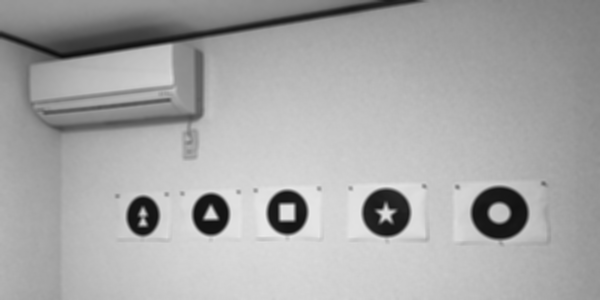

In [28]:
# -*- coding: utf-8 -*-

import cv2
import numpy as np
import random
import sys
#サポートパッチのインポート
from google.colab.patches import cv2_imshow


# 対象画像を指定
input_image_path = '02_color.png'

# 画像をグレースケールで読み込み
gray_src = cv2.imread(input_image_path, 0)

print(gray_src.shape)
# 前処理（平準化フィルターを適用した場合）
# 前処理が不要な場合は下記行をコメントアウト
blur_src = cv2.GaussianBlur(gray_src, (5, 5), 2)

cv2_imshow(blur_src)


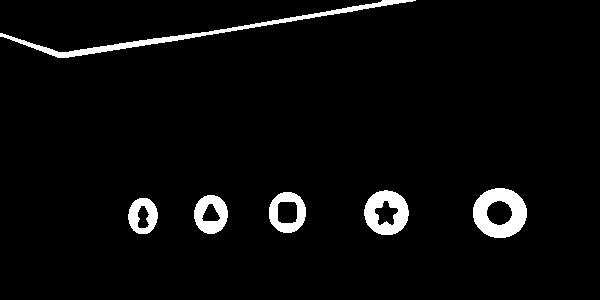

In [6]:
# 二値変換
# 前処理を使用しなかった場合は、blur_srcではなくgray_srcに書き換えるする
mono_src = cv2.threshold(blur_src, 48, 255, cv2.THRESH_BINARY_INV)[1]

cv2_imshow(mono_src)

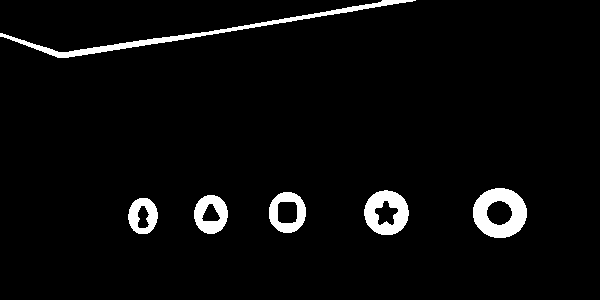

In [8]:

# ラベリング結果書き出し用に二値画像をカラー変換
color_src01 = cv2.cvtColor(mono_src, cv2.COLOR_GRAY2BGR)
color_src02 = cv2.cvtColor(mono_src, cv2.COLOR_GRAY2BGR)
cv2_imshow(color_src02)

7 (300, 600) (7, 5) (7, 2)
(600,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

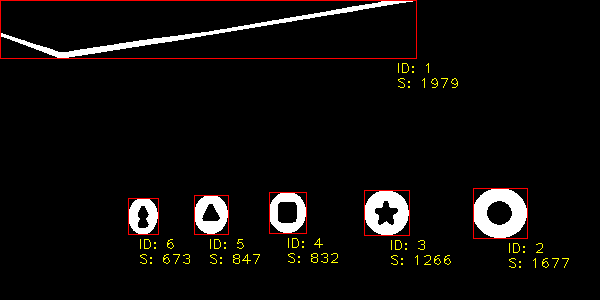

In [27]:

# ラベリング処理
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(mono_src)
print(nlabels,labels.shape,stats.shape, centroids.shape)
print(labels[0].shape)
print(labels[1])
print(labels[12].shape)



label = cv2.connectedComponentsWithStats(mono_src)

# オブジェクト情報を項目別に抽出
n = label[0] - 1
data = np.delete(label[2], 0, 0)
center = np.delete(label[3], 0, 0)

# オブジェクト情報を利用してラベリング結果を画面に表示
for i in range(n):

    # 各オブジェクトの外接矩形を赤枠で表示
    x0 = data[i][0]
    y0 = data[i][1]
    x1 = data[i][0] + data[i][2]
    y1 = data[i][1] + data[i][3]
    cv2.rectangle(color_src01, (x0, y0), (x1, y1), (0, 0, 255))
    cv2.rectangle(color_src02, (x0, y0), (x1, y1), (0, 0, 255))

    # 各オブジェクトのラベル番号と面積に黄文字で表示
    cv2.putText(color_src01, "ID: " +str(i + 1), (x1 - 20, y1 + 15), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 255))
    cv2.putText(color_src01, "S: " +str(data[i][4]), (x1 - 20, y1 + 30), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 255))

    # 各オブジェクトの重心座標をに黄文字で表示
    cv2.putText(color_src02, "X: " + str(int(center[i][0])), (x1 - 30, y1 + 15), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 255))
    cv2.putText(color_src02, "Y: " + str(int(center[i][1])), (x1 - 30, y1 + 30), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 255))

# 結果の表示
cv2_imshow(color_src01)


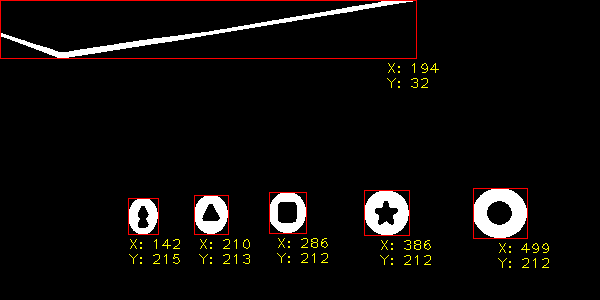

In [14]:
cv2_imshow(color_src02)